<a href="https://colab.research.google.com/github/superahxd/_project/blob/main/project2/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# drive.mount
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# 라이브러리 불러오기
import os
import cv2
import random

from matplotlib import pyplot as plt

import numpy as np

In [ ]:
# 경로 저장
path = '/content/drive/MyDrive/Colab Notebooks/project/data/'

names = [file for file in os.listdir(path+'train/')]
names = sorted(names)

n = len(names)
n

11952

In [ ]:
"""
# 시드 고정
random.seed(34)

images = []
labels = []

for i in range(n):
    img = cv2.imread(path+'train/'+names[i], cv2.IMREAD_COLOR)
    # 이미지 흑백화 안할거면 아래 gray코드 지울 것
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    height, width = gray.shape
    img = cv2.resize(gray, (max(height, width), max(height, width)))
    height, width = img.shape
    
    blur = cv2.GaussianBlur(img,(0,0),2)
    img = cv2.addWeighted(blur, 2, img, -0.5, 0)



    num_li = []
    # 하나의 이미지를 몇 번 돌릴 것인가 -> 12를 원하는 개수로 바꾸기
    # 하나의 이미지를 360번 돌릴거면 아래의 While문 삭제
    while len(num_li) < 12 :
      num = random.randrange(0, 360, 1)
      if num not in num_li :
        num_li.append(num)

    for num in num_li :
          labels.append(num)
          matrix = cv2.getRotationMatrix2D((height/2, width/2), num, 1)
          dst = cv2.warpAffine(img, matrix, (width, height))
          # 센터 중심 Crop할 때 사용한 코드
          # roi = dst[int(height*(0.25)):int(height*(0.75)), int(width*(0.25)):int(width*(0.75))]
          # 이미지 사이즈 지정
          roi = cv2.resize(dst,(224, 224))
          images.append(roi)
          # 이미지를 외부로 저장 -> 저장 안하는게 처리 속도가 빠른 것 같긴 합니다
          # cv2.imwrite(path+'rotate_1_180/'+names[i], roi)
"""

"\n# 시드 고정\nrandom.seed(34)\n\nimages = []\nlabels = []\n\nfor i in range(n):\n    img = cv2.imread(path+'train/'+names[i], cv2.IMREAD_COLOR)\n    # 이미지 흑백화 안할거면 아래 gray코드 지울 것\n    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n\n    height, width = gray.shape\n    img = cv2.resize(gray, (max(height, width), max(height, width)))\n    height, width = img.shape\n    \n    blur = cv2.GaussianBlur(img,(0,0),2)\n    img = cv2.addWeighted(blur, 2, img, -0.5, 0)\n\n\n\n    num_li = []\n    # 하나의 이미지를 몇 번 돌릴 것인가 -> 12를 원하는 개수로 바꾸기\n    # 하나의 이미지를 360번 돌릴거면 아래의 While문 삭제\n    while len(num_li) < 12 :\n      num = random.randrange(0, 360, 1)\n      if num not in num_li :\n        num_li.append(num)\n\n    for num in num_li :\n          labels.append(num)\n          matrix = cv2.getRotationMatrix2D((height/2, width/2), num, 1)\n          dst = cv2.warpAffine(img, matrix, (width, height))\n          # 센터 중심 Crop할 때 사용한 코드\n          # roi = dst[int(height*(0.25)):int(height*(0.75)), int(width*(0.2

In [ ]:

#adaptive블러 적용할 때 사용한 코드

# 시드 고정
random.seed(34)

images = []
labels = []

for i in range(n):
    img = cv2.imread(path + 'train/' + names[i], cv2.IMREAD_COLOR)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (17, 17), 0)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2. THRESH_BINARY, 21, 15)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 1))
    dilate = cv2.dilate(thresh, kernel, iterations=7)

    height, width, channel = img.shape
    num = random.randrange(0, 180, 10)
    labels.append(num)

    img = cv2.resize(dilate, (max(height, width), max(height, width)))
    height, width = img.shape

    matrix = cv2.getRotationMatrix2D((height/2, width/2), num, 1)
    dst = cv2.warpAffine(img, matrix, (width, height))
    roi = cv2.resize(dst,(128, 128))

    images.append(roi)
    cv2.imwrite(path + 'rotate_blur_adaptive/' + names[i], roi)

#이미지 사이즈, 회전 각도, 이미지 저장 경로 이외에 별다른 수정 안함

#+ train_x = train_x / 255.0 로 정규화 진행


In [ ]:
# 데이터 array화
train_x = np.array(images)
train_y = np.array(labels)

In [ ]:
# 부여한 랜덤 값 확인
print(set(train_y))
print(len(set(train_y)))

{160, 0, 130, 100, 70, 40, 10, 170, 140, 110, 80, 50, 20, 150, 120, 90, 60, 30}
18


In [ ]:
# 결과 데이터 내보내기 -> 이진화 및 shuffle 작업 간 램이 오버될 수 있어서 임시로 저장하는 목적
np.save('/content/drive/MyDrive/Colab Notebooks/project/data/train_x_no_crop_1_180_1_224_gray_x12_adaptive.npy', train_x)
np.save('/content/drive/MyDrive/Colab Notebooks/project/data/train_y_no_crop_1_180_1_224.gray_x12_adaptive.npy', train_y)

In [ ]:
# 결과 데이터 가져오기
train_x = np.load('/content/drive/MyDrive/Colab Notebooks/project/data/train_x_no_crop_1_180_1_224_gray_x12_adaptive.npy')
train_y = np.load('/content/drive/MyDrive/Colab Notebooks/project/data/train_y_no_crop_1_180_1_224.gray_x12_adaptive.npy')

# 결과 확인
train_x.shape, train_y.shape

((11952, 128, 128), (11952,))

In [ ]:
# 데이터 이진화
train_x = np.where(train_x < 255, 1, train_x)
train_x = np.where(train_x == 255, 0, train_x)

In [ ]:
# random shuffle 전 형태 확인
train_y[0:10]

array([160, 110,   0,  70,   0, 120, 110,  20, 130,  90])

In [ ]:
# 시드 고정
np.random.seed(34)

# 배열의 원소 개수만큼 인덱스 배열을 만든 후 shuffle
idx = np.arange(train_y.shape[0])
np.random.shuffle(idx)

# 뒤섞여있는 인덱스 배열을 사용하여 X, Y 두 배열을 같은 순서로 섞기
train_x = train_x[idx]
train_y = train_y[idx]

# 결과 확인
train_y[0:10]

array([120, 130,  10, 110,  20,  30,  20,  90,  90,  20])

In [ ]:
# 최종 결과 내보내기
np.save('/content/drive/MyDrive/Colab Notebooks/project/data/train_x_no_crop_1_180_1_224_gray_x15_adaptive_shu.npy', train_x)
np.save('/content/drive/MyDrive/Colab Notebooks/project/data/train_y_no_crop_1_180_1_224_gray_x15_adaptive_shu.npy', train_y)

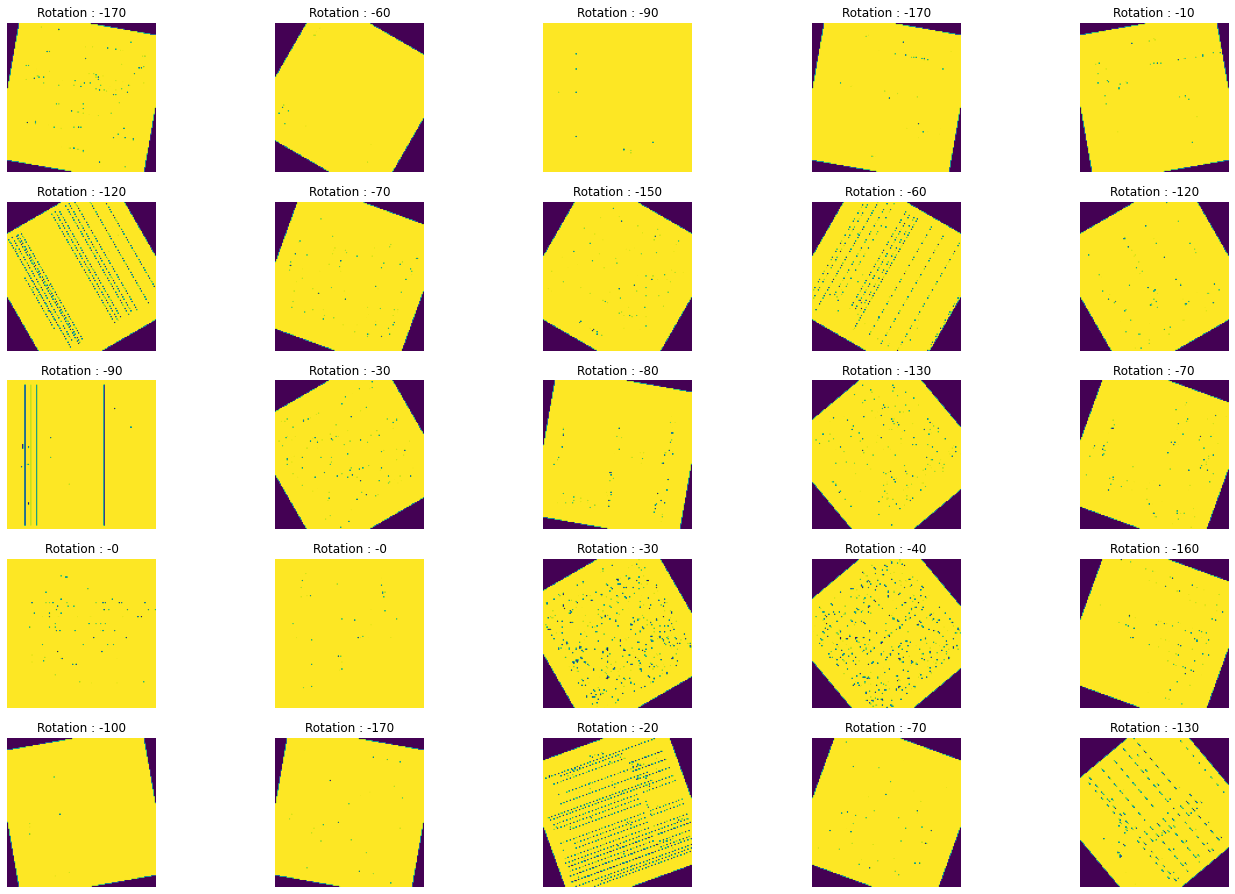

In [ ]:
# 결과 시각화
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = random.randrange(0, len(images))
        ax[i,j].imshow(images[rnd_number])
        ax[i,j].set_title(f"Rotation : -{labels[rnd_number]}")
        ax[i,j].axis('off')

In [ ]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')